### Lab-4 CNN Architectures

Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import os
import zipfile
import seaborn as sns

***Downloading the dataset***

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-28 17:06:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  98.7MB/s    in 0.7s    

2022-08-28 17:07:00 (98.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



**Extracting the dataset**

In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

***Split the data***

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])
# train_cat_fnames contains the cats data

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])
# train_dog_fnames contains the dogs data


['cat.930.jpg', 'cat.649.jpg', 'cat.458.jpg', 'cat.205.jpg', 'cat.78.jpg', 'cat.901.jpg', 'cat.303.jpg', 'cat.732.jpg', 'cat.593.jpg', 'cat.687.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


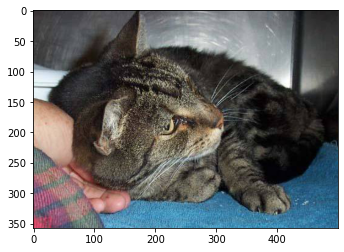

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# vizualizing an image
plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

In [ ]:
def plot(history):
  sns.set_style("darkgrid")
  #get the details form the history object
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  #Train and validation accuracy
  plt.plot(epochs, acc, 'b', label='Training accurarcy')
  plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
  plt.xlabel('Epoch #')
  plt.ylabel('accuracy')
  plt.title('Training and Validation accurarcy')
  plt.legend()


  plt.figure()
  #Train and validation loss
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

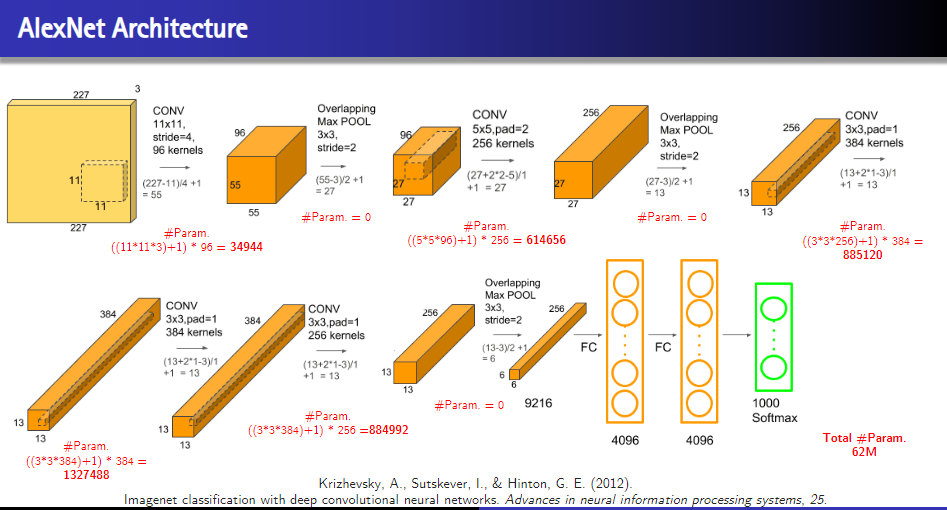

**Building the above AlexNet Architecture**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape =(227,227,3)),
    tf.keras.layers.Conv2D(96,kernel_size=(11,11),strides=(4,4),activation="relu",padding="valid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="valid"),

    tf.keras.layers.Conv2D(256,kernel_size=(5,5),activation="relu",padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="valid"),

    tf.keras.layers.Conv2D(384,kernel_size=(3,3),activation="relu",padding="same"),

    tf.keras.layers.Conv2D(384,kernel_size=(3,3),activation="relu",padding="same"),

    tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation="relu",padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="valid"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dense(2, activation="sigmoid")
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
#plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
100/100 [==============================] - 22s 184ms/step - loss: 1.2302 - acc: 0.5650 - val_loss: 0.8368 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 11s 109ms/step - loss: 0.6675 - acc: 0.6610 - val_loss: 3.3729 - val_acc: 0.5000
Epoch 3/20
100/100 [==============================] - 11s 114ms/step - loss: 0.5785 - acc: 0.7140 - val_loss: 1.0632 - val_acc: 0.5530
Epoch 4/20
100/100 [==============================] - 11s 108ms/step - loss: 0.4929 - acc: 0.7520 - val_loss: 1.6351 - val_acc: 0.5170
Epoch 5/20
100/100 [==============================] - 11s 109ms/step - loss: 0.4259 - acc: 0.8155 - val_loss: 0.9725 - val_acc: 0.6130
Epoch 6/20
100/100 [==============================] - 11s 108ms/step - loss: 0.3398 - acc: 0.8475 - val_loss: 0.7423 - val_acc: 0.6550
Epoch 7/20
100/100 [==============================] - 12s 120ms/step - loss: 0.3139 - acc: 0.8680 - val_loss: 0.6469 - val_acc: 0.6490
Epoch 8/20
100/100 [==============================] - 1

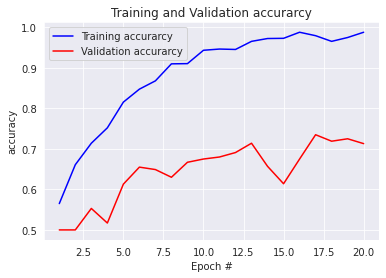

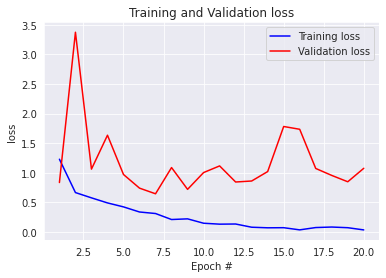

In [ ]:
plot(history)

In [ ]:
model.evaluate(validation_generator)

50/50 [==============================] - 4s 70ms/step - loss: 1.0772 - acc: 0.7130


[1.077201247215271, 0.7129999995231628]

## **1) VGG-16 model**

In [ ]:
from keras.applications.vgg16 import VGG16
base_model1 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model1.trainable = False #freeze the layers
base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Add new layers and compile the model for the new dataset**

In [ ]:
import tensorflow as tf
model1 = tf.keras.Sequential([
    base_model1,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#plot_model(model1,  show_shapes=True, show_layer_names=True)

**Train the model**

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
history1 = model1.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
100/100 [==============================] - 20s 172ms/step - loss: 0.4675 - acc: 0.7795 - val_loss: 0.3460 - val_acc: 0.8570
Epoch 2/20
100/100 [==============================] - 17s 171ms/step - loss: 0.2810 - acc: 0.8950 - val_loss: 0.3044 - val_acc: 0.8700
Epoch 3/20
100/100 [==============================] - 17s 173ms/step - loss: 0.2197 - acc: 0.9295 - val_loss: 0.2532 - val_acc: 0.9020
Epoch 4/20
100/100 [==============================] - 17s 173ms/step - loss: 0.1829 - acc: 0.9450 - val_loss: 0.2410 - val_acc: 0.9090
Epoch 5/20
100/100 [==============================] - 17s 174ms/step - loss: 0.1560 - acc: 0.9570 - val_loss: 0.2333 - val_acc: 0.9110
Epoch 6/20
100/100 [==============================] - 17s 175ms/step - loss: 0.1348 - acc: 0.9645 - val_loss: 0.2262 - val_acc: 0.9060
Epoch 7/20
100/100 [==============================] - 18s 176ms/step - loss: 0.1199 - acc: 0.9730 - val_loss: 0.2329 - val_acc: 0.9090
Epoch 8/20
100/100 [==============================] - 1

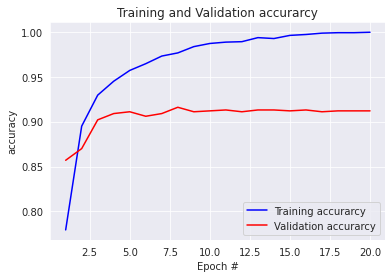

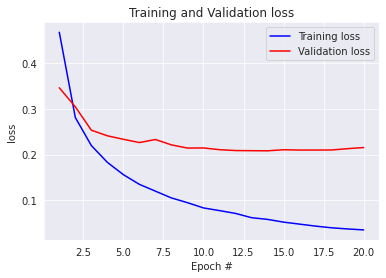

In [ ]:
plot(history1)

In [ ]:
model1.evaluate(validation_generator)

50/50 [==============================] - 6s 119ms/step - loss: 0.2153 - acc: 0.9120


[0.21530336141586304, 0.9120000004768372]

## **2) GoogleNet/InceptionV3 model**

In [ ]:
base_model2 = tf.keras.applications.inception_v3.InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model2.trainable = False #freeze the layers
base_model2.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 111, 111, 32  96         ['conv2d_5[0][0]']               
 rmalization)                   )                                                      

**Add new layers and compile the model for the new dataset**

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
#plot_model(model2,  show_shapes=True, show_layer_names=True)

In [ ]:
history2 = model2.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
100/100 [==============================] - 18s 128ms/step - loss: 0.1393 - acc: 0.9495 - val_loss: 0.0497 - val_acc: 0.9850
Epoch 2/20
100/100 [==============================] - 12s 118ms/step - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0476 - val_acc: 0.9860
Epoch 3/20
100/100 [==============================] - 12s 118ms/step - loss: 0.0034 - acc: 0.9995 - val_loss: 0.0474 - val_acc: 0.9870
Epoch 4/20
100/100 [==============================] - 12s 120ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0451 - val_acc: 0.9870
Epoch 5/20
100/100 [==============================] - 12s 118ms/step - loss: 9.0098e-04 - acc: 1.0000 - val_loss: 0.0465 - val_acc: 0.9860
Epoch 6/20
100/100 [==============================] - 12s 118ms/step - loss: 6.9357e-04 - acc: 1.0000 - val_loss: 0.0459 - val_acc: 0.9850
Epoch 7/20
100/100 [==============================] - 12s 116ms/step - loss: 5.6798e-04 - acc: 1.0000 - val_loss: 0.0464 - val_acc: 0.9860
Epoch 8/20
100/100 [=======================

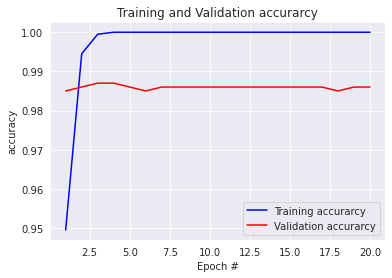

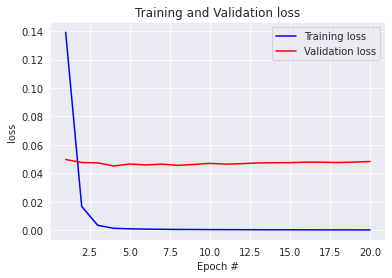

In [ ]:
plot(history2)

In [ ]:
model2.evaluate(validation_generator)

50/50 [==============================] - 4s 79ms/step - loss: 0.0483 - acc: 0.9860


[0.048296790570020676, 0.9860000014305115]

## **3) ResNet50 model**

In [ ]:
base_model3 = tf.keras.applications.ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model3.trainable = False #freeze the layers
base_model3.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

**Add new layers and compile the model for the new dataset**

In [ ]:
import tensorflow as tf
model3 = tf.keras.Sequential([
    base_model3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_5 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


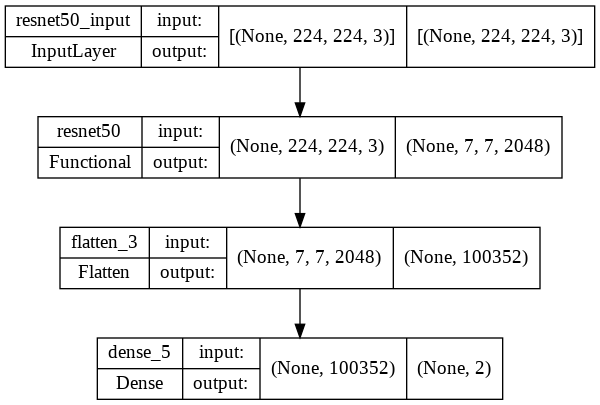

In [ ]:
plot_model(model3,  show_shapes=True, show_layer_names=True)

In [ ]:
history3 = model3.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
100/100 [==============================] - 17s 137ms/step - loss: 0.6959 - acc: 0.5755 - val_loss: 0.6279 - val_acc: 0.6440
Epoch 2/20
100/100 [==============================] - 13s 128ms/step - loss: 0.6257 - acc: 0.6490 - val_loss: 0.6208 - val_acc: 0.6570
Epoch 3/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6033 - acc: 0.6705 - val_loss: 0.6136 - val_acc: 0.6710
Epoch 4/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6010 - acc: 0.6680 - val_loss: 0.6197 - val_acc: 0.6560
Epoch 5/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6385 - acc: 0.6410 - val_loss: 0.6064 - val_acc: 0.6730
Epoch 6/20
100/100 [==============================] - 13s 127ms/step - loss: 0.6159 - acc: 0.6685 - val_loss: 0.8376 - val_acc: 0.5150
Epoch 7/20
100/100 [==============================] - 13s 126ms/step - loss: 0.5747 - acc: 0.6910 - val_loss: 0.6453 - val_acc: 0.6370
Epoch 8/20
100/100 [==============================] - 1

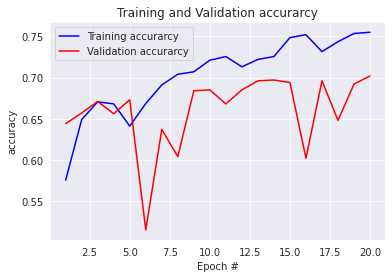

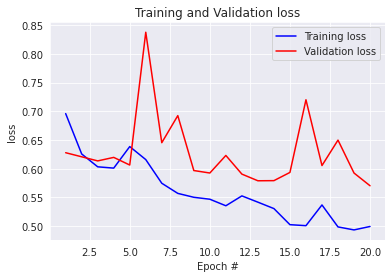

In [ ]:
plot(history3)

In [ ]:
model3.evaluate(validation_generator)

50/50 [==============================] - 4s 86ms/step - loss: 0.5703 - acc: 0.7020


[0.5703257918357849, 0.7020000219345093]

## **4) EfficientNetB0 model**

In [ ]:
base_model4 = tf.keras.applications.EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model4.trainable = False #freeze the layers
base_model4.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

**Add new layers and compile the model for the new dataset**

In [ ]:
import tensorflow as tf
model4 = tf.keras.Sequential([
    base_model4,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model4.summary()

model4.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


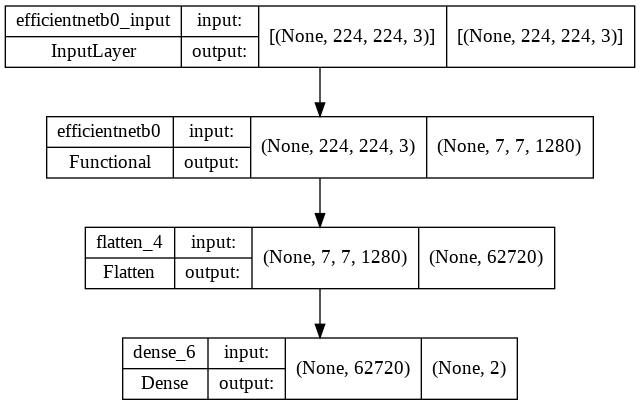

In [ ]:
plot_model(model4,  show_shapes=True, show_layer_names=True)

In [ ]:
history4 = model4.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
100/100 [==============================] - 19s 127ms/step - loss: 0.7732 - acc: 0.5175 - val_loss: 0.7411 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 11s 112ms/step - loss: 0.7613 - acc: 0.4840 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 3/20
100/100 [==============================] - 11s 113ms/step - loss: 0.7364 - acc: 0.4985 - val_loss: 0.6939 - val_acc: 0.5000
Epoch 4/20
100/100 [==============================] - 11s 112ms/step - loss: 0.7321 - acc: 0.4935 - val_loss: 0.7207 - val_acc: 0.5000
Epoch 5/20
100/100 [==============================] - 11s 114ms/step - loss: 0.7395 - acc: 0.4995 - val_loss: 0.8019 - val_acc: 0.5000
Epoch 6/20
100/100 [==============================] - 11s 114ms/step - loss: 0.7458 - acc: 0.5125 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 7/20
100/100 [==============================] - 11s 113ms/step - loss: 0.7785 - acc: 0.4990 - val_loss: 0.7852 - val_acc: 0.5000
Epoch 8/20
100/100 [==============================] - 1

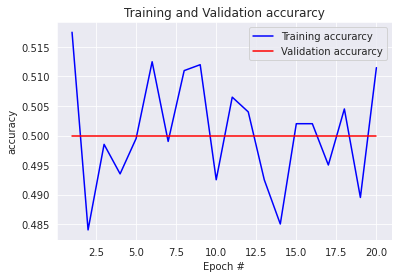

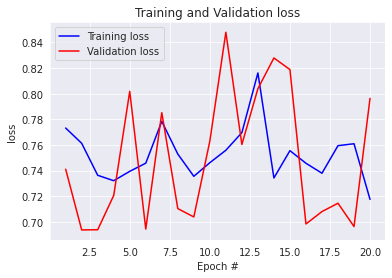

In [ ]:
plot(history4)

In [ ]:
model4.evaluate(validation_generator)

50/50 [==============================] - 4s 77ms/step - loss: 0.7964 - acc: 0.5000


[0.7964249849319458, 0.5]

## **5) MobileNetV2 model**

In [ ]:
base_model5 = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model5.trainable = False #freeze the layers
base_model5.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

**Add new layers and compile the model for the new dataset**

In [ ]:
import tensorflow as tf
model5 = tf.keras.Sequential([
    base_model5,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model5.summary()

model5.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


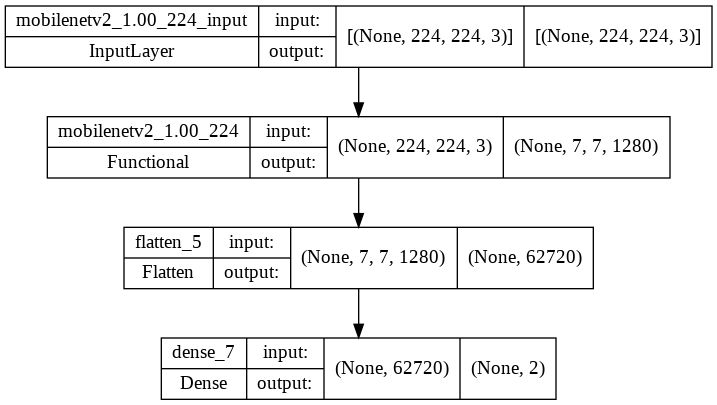

In [ ]:
plot_model(model5,  show_shapes=True, show_layer_names=True)

In [ ]:
history5 = model5.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
100/100 [==============================] - 14s 118ms/step - loss: 0.1409 - acc: 0.9480 - val_loss: 0.0626 - val_acc: 0.9800
Epoch 2/20
100/100 [==============================] - 12s 116ms/step - loss: 0.0085 - acc: 0.9965 - val_loss: 0.0605 - val_acc: 0.9850
Epoch 3/20
100/100 [==============================] - 11s 110ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0616 - val_acc: 0.9840
Epoch 4/20
100/100 [==============================] - 11s 107ms/step - loss: 5.4878e-04 - acc: 1.0000 - val_loss: 0.0622 - val_acc: 0.9840
Epoch 5/20
100/100 [==============================] - 11s 108ms/step - loss: 4.1917e-04 - acc: 1.0000 - val_loss: 0.0623 - val_acc: 0.9840
Epoch 6/20
100/100 [==============================] - 11s 109ms/step - loss: 3.4339e-04 - acc: 1.0000 - val_loss: 0.0624 - val_acc: 0.9840
Epoch 7/20
100/100 [==============================] - 11s 107ms/step - loss: 2.8817e-04 - acc: 1.0000 - val_loss: 0.0627 - val_acc: 0.9850
Epoch 8/20
100/100 [===================

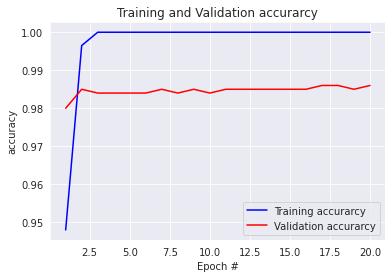

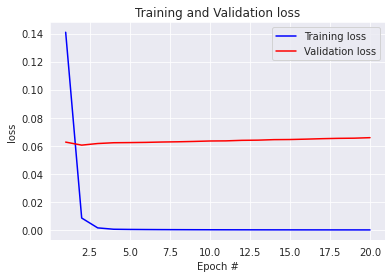

In [ ]:
plot(history5)

In [ ]:
model5.evaluate(validation_generator)

50/50 [==============================] - 4s 76ms/step - loss: 0.0658 - acc: 0.9860


[0.06579737365245819, 0.9860000014305115]

### ***Performance:***

Based on the above results, VGG16 model shows high performance compared to remaining ones but they can be improved by changing different hyper-parameters such as learning rate and including multiple batch normalization and dropout layers in the alexnet.